# Assignment Tasks

# Step 1 – Data Exploration & Cleaning
1. Load the dataset in pandas.
2. Inspect the structure — columns, datatypes, and summary statistics.
3. Handle **missing values** appropriately.
4. Convert `Activity Date` to datetime.
5. Create new columns:
    - `Weekday` (Mon, Tue, etc.)
    - `Month`
    - `Calories per Minute` = Calories Burned / Duration (min)
6. Remove any duplicate entries.

- **Load dataset using Pandas**

In [1]:
import pandas as pd
fit = pd.read_csv(r'C:\Users\ziaah\OneDrive\Desktop\Z_Work\My Work\Sir Raheel Task\fitness_wellness_app_data.csv')

- **Inspect the structure — columns, datatypes, and summary statistics.**

In [2]:
fit[fit.isna().any(axis=1)]  #See rows with NaNs

,Record ID,User ID,City,Gender,Age,Activity Type,Activity Date,Duration (min),Calories Burned,Subscription Plan,Device Used,Monthly Fee,Session Rating
9,10,1771,NaN,Male,42,Strength Training,14-12-2023,155.7,872.2,Pro,Android,2000.0,3.3
17,18,1656,Lahore,Male,27,Swimming,24-10-2023,91.6,437.3,Pro,Android,NaN,3.3
31,32,9490,Karachi,Female,43,Yoga,19-09-2023,79.6,361.2,Basic,Web,NaN,3.3
32,33,4039,Multan,Female,20,Cycling,06-12-2023,179.6,1001.3,Basic,Android,NaN,4.8
34,35,2159,Islamabad,Male,53,Running,26-03-2023,159.1,847.2,Free,Android,NaN,3.5
43,44,1176,Islamabad,Female,50,Swimming,21-10-2023,110.5,561.7,Basic,iOS,NaN,3.2
56,57,8488,Quetta,Other,34,Cycling,13-04-2023,47.9,NaN,Premium,iOS,1200.0,4.2
57,58,5041,Multan,Male,36,Swimming,20-03-2023,37.2,425.1,Free,Android,NaN,4.3
66,67,4379,Islamabad,Female,23,Swimming,11-09-2023,21.3,NaN,Free,Web,0.0,5.0
92,93,8136,Islamabad,Male,55,Running,21-08-2023,56.3,529.3,Pro,Android,NaN,3.8


In [3]:
fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Record ID          220 non-null    int64  
 1   User ID            220 non-null    int64  
 2   City               217 non-null    object 
 3   Gender             220 non-null    object 
 4   Age                220 non-null    int64  
 5   Activity Type      220 non-null    object 
 6   Activity Date      220 non-null    object 
 7   Duration (min)     220 non-null    float64
 8   Calories Burned    217 non-null    float64
 9   Subscription Plan  220 non-null    object 
 10  Device Used        220 non-null    object 
 11  Monthly Fee        198 non-null    float64
 12  Session Rating     220 non-null    float64
dtypes: float64(4), int64(3), object(6)
memory usage: 22.5+ KB


In [4]:
(fit == 0.0).sum()  # Count how many zeros are in each column

Record ID             0
User ID               0
City                  0
Gender                0
Age                   0
Activity Type         0
Activity Date         0
Duration (min)        0
Calories Burned       0
Subscription Plan     0
Device Used           0
Monthly Fee          57
Session Rating        0
dtype: int64

In [5]:
fit[(fit == 0.0).any(axis=1)]  # See rows containing at least one 0.0

,Record ID,User ID,City,Gender,Age,Activity Type,Activity Date,Duration (min),Calories Burned,Subscription Plan,Device Used,Monthly Fee,Session Rating
0,1,8363,Multan,Female,40,Swimming,21-01-2023,52.3,277.4,Free,iOS,0.0,4.6
5,6,8575,Peshawar,Male,45,Cycling,20-08-2023,89.7,767.8,Free,Android,0.0,4.3
8,9,3786,Peshawar,Male,37,Yoga,05-03-2023,71.2,368.0,Free,iOS,0.0,4.1
10,11,1003,Lahore,Female,48,Cycling,29-07-2023,46.3,545.7,Free,Web,0.0,4.7
14,15,8942,Peshawar,Female,23,Running,16-10-2023,36.1,403.2,Free,Android,0.0,3.4
15,16,3184,Karachi,Female,27,Swimming,21-12-2023,111.0,481.9,Free,Android,0.0,4.3
22,23,2956,Karachi,Female,47,Yoga,01-12-2023,91.3,977.1,Free,Web,0.0,4.0
26,27,2058,Multan,Other,38,Yoga,04-12-2023,47.8,494.8,Free,Web,0.0,4.4
29,30,4379,Karachi,Male,18,Running,11-12-2023,135.8,1225.0,Free,iOS,0.0,4.8
33,34,6404,Peshawar,Other,28,Walking,10-07-2023,120.1,507.0,Free,Android,0.0,4.3


In [6]:
fit['City'] = fit['City'].fillna('GHQ')

In [7]:
fit[fit['Calories Burned'].isna()]

,Record ID,User ID,City,Gender,Age,Activity Type,Activity Date,Duration (min),Calories Burned,Subscription Plan,Device Used,Monthly Fee,Session Rating
56,57,8488,Quetta,Other,34,Cycling,13-04-2023,47.9,NaN,Premium,iOS,1200.0,4.2
66,67,4379,Islamabad,Female,23,Swimming,11-09-2023,21.3,NaN,Free,Web,0.0,5.0
108,109,2232,Karachi,Female,48,Walking,01-08-2023,164.1,NaN,Basic,Web,500.0,4.8


In [8]:
fit.fillna({'Calories Burned': round(fit['Calories Burned'].mean())},inplace=True)

In [9]:
fit['Monthly Fee'].isna().sum()

np.int64(22)

<Axes: ylabel='Monthly Fee'>

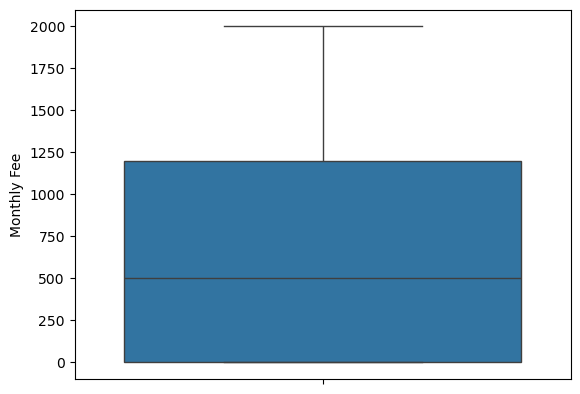

In [10]:
import seaborn as sb
sb.boxplot(fit['Monthly Fee'])

In [11]:
fit.fillna({'Monthly Fee': round(fit['Monthly Fee'].mean())}, inplace=True)

In [12]:
fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Record ID          220 non-null    int64  
 1   User ID            220 non-null    int64  
 2   City               220 non-null    object 
 3   Gender             220 non-null    object 
 4   Age                220 non-null    int64  
 5   Activity Type      220 non-null    object 
 6   Activity Date      220 non-null    object 
 7   Duration (min)     220 non-null    float64
 8   Calories Burned    220 non-null    float64
 9   Subscription Plan  220 non-null    object 
 10  Device Used        220 non-null    object 
 11  Monthly Fee        220 non-null    float64
 12  Session Rating     220 non-null    float64
dtypes: float64(4), int64(3), object(6)
memory usage: 22.5+ KB


- **Convert Activity Date to datetime.**

In [13]:
fit['Activity Date'] = pd.to_datetime(fit['Activity Date'], dayfirst=True)

- **Create new columns:**
  
1.Weekday (Mon, Tue, etc.)

2.Month

3.Calories per Minute = Calories Burned / Duration (min)

In [14]:
fit['Day'] = fit['Activity Date'].dt.day_name()

In [15]:
fit['Month'] = fit['Activity Date'].dt.strftime('%B')

In [16]:
fit.sample(5)

,Record ID,User ID,City,Gender,Age,Activity Type,Activity Date,Duration (min),Calories Burned,Subscription Plan,Device Used,Monthly Fee,Session Rating,Day,Month
21,22,9454,Multan,Male,65,Strength Training,2023-02-15,56.3,617.0,Premium,Android,1200.0,3.2,Wednesday,February
151,152,8015,Quetta,Other,63,Running,2023-03-28,141.6,1694.5,Free,Android,0.0,3.5,Tuesday,March
29,30,4379,Karachi,Male,18,Running,2023-12-11,135.8,1225.0,Free,iOS,0.0,4.8,Monday,December
209,210,4148,Lahore,Other,54,Cycling,2023-04-02,76.7,806.7,Pro,iOS,2000.0,3.1,Sunday,April
116,117,1077,Lahore,Male,30,Cycling,2023-10-22,88.0,426.7,Pro,Web,2000.0,4.3,Sunday,October


In [17]:
Cal_per_min = (fit['Calories Burned'] / fit['Duration (min)']).reset_index().sample(10)
Cal_per_min

,index,0
98,98,11.287313
198,198,5.184919
195,195,6.975145
64,64,7.627986
35,35,6.580882
121,121,5.298643
168,168,11.362475
97,97,8.803922
158,158,4.068333
210,210,9.707126


- **Remove any duplicate entries.**

In [18]:
fit.duplicated().sum()

np.int64(0)

# Step 2 – Descriptive Statistics & Insights
Perform at least **10 different statistical and visual analyses:**
- User count by **city**
- Most frequent **activity type**
- Average **duration** per activity type
- Average **calories burned** per gender
- **Subscription plan** distribution
- Device usage patterns
- Age group distribution (`<20 , 20-29 , 30-39 , 40+`)
- Weekday vs weekend **calorie comparison**
- Monthly active users trend
- Revenue trend based on subscription fees

- **User count by city**

In [19]:
count_by_city = fit.groupby('City')['User ID'].count().reset_index()
count_by_city

,City,User ID
0,GHQ,3
1,Islamabad,36
2,Karachi,38
3,Lahore,24
4,Multan,44
5,Peshawar,31
6,Quetta,44


- **Most frequent activity type**

In [20]:
frequent_activity_type = fit['Activity Type'].value_counts().reset_index()
frequent_activity_type

,Activity Type,count
0,Cycling,43
1,Walking,41
2,Strength Training,41
3,Yoga,39
4,Swimming,34
5,Running,22


- **Average duration per activity type**

In [21]:
duration_per_activity = fit.groupby('Activity Type')['Duration (min)'].mean().sort_values(ascending=False).reset_index()
duration_per_activity

,Activity Type,Duration (min)
0,Running,105.022727
1,Cycling,104.323256
2,Strength Training,103.265854
3,Walking,102.651220
4,Swimming,93.167647
5,Yoga,89.997436


- **Subscription plan distribution**

In [22]:
Subs_plan_dist = fit.groupby('Subscription Plan')['User ID'].count().reset_index()
Subs_plan_dist

,Subscription Plan,User ID
0,Basic,52
1,Free,59
2,Premium,55
3,Pro,54


- **Device usage patterns**

In [23]:
Device_usage = fit.groupby('Device Used')['Age'].count().reset_index()
Device_usage

,Device Used,Age
0,Android,71
1,Web,81
2,iOS,68


- **Age group distribution (<20 , 20-29 , 30-39 , 40+)**

In [24]:
fit['Age_group'] = fit['Age'].apply(lambda x : '<20' if x<20 else  '20-29' if x<30 else '30-39' if x<40 else '40+' )
fit[['Age','Age_group']].head(15)

,Age,Age_group
0,40,40+
1,25,20-29
2,52,40+
3,30,30-39
4,60,40+
5,45,40+
6,49,40+
7,35,30-39
8,37,30-39
9,42,40+


- **Weekday vs weekend calorie comparison**

In [25]:
fit["Day"] = fit["Activity Date"].dt.day_name()
fit["Weekend"] = fit["Activity Date"].dt.dayofweek >=5

fit.groupby('Weekend')['Calories Burned'].mean().sort_values(ascending=False).rename({False: "Weekday", True: "Weekend"}).reset_index()

,Weekend,Calories Burned
0,Weekend,785.968657
1,Weekday,764.795425


- **Monthly active users trend**

In [45]:
Monthly_active_users = fit.groupby('Month')['Monthly Fee'].sum().sort_values(ascending=False).head(13).reset_index()
Monthly_active_users

,Month,Monthly Fee
0,September,25555.0
1,March,19025.0
2,December,18670.0
3,October,18525.0
4,May,18085.0
5,August,17955.0
6,November,14600.0
7,January,14170.0
8,February,13800.0
9,April,12400.0


In [26]:
Monthly_active_users = fit.groupby('User ID')['Duration (min)'].sum().sort_values(ascending=False).head().reset_index()
Monthly_active_users

,User ID,Duration (min)
0,3786,220.5
1,8305,219.4
2,2147,187.5
3,4039,179.6
4,9991,179.3


- **Revenue trend based on subscription fees**

In [27]:
Revenue_trend = fit.groupby('Subscription Plan')['Monthly Fee'].count().sort_values(ascending=False).reset_index()
Revenue_trend

,Subscription Plan,Monthly Fee
0,Free,59
1,Premium,55
2,Pro,54
3,Basic,52


# Step 3 – Deep-Dive Analysis
1. **Top 10 most active users** (highest total duration).
2. **Most loyal subscribers** (Premium/Pro with maximum subscription months).
3. **Highest rated activity types.**
4. Find **cities** with the most Premium/Pro users.
5. Detect if users with **longer durations** tend to give higher ratings.

1. **Top 10 most active users** (highest total duration).

In [28]:
fit.groupby('User ID')['Duration (min)'].sum().sort_values(ascending=False).head(10).reset_index()

,User ID,Duration (min)
0,3786,220.5
1,8305,219.4
2,2147,187.5
3,4039,179.6
4,9991,179.3
5,6866,178.3
6,7419,178.3
7,9789,178.2
8,2102,178.0
9,7640,177.5


2. **Most loyal subscribers** (Premium/Pro with maximum subscription months).

In [29]:
loyal_subs = (fit[fit['Subscription Plan'].isin(['Premium','Pro'])].groupby(['User ID','Subscription Plan']).agg({'Month':'count'}).reset_index().sort_values(by='Month', ascending=False))
loyal_subs.head(10)

,User ID,Subscription Plan,Month
0,1070,Premium,1
1,1077,Pro,1
2,1145,Premium,1
3,1154,Premium,1
4,1338,Premium,1
5,1370,Pro,1
6,1550,Pro,1
7,1558,Pro,1
8,1656,Pro,1
9,1771,Pro,1


3. **Highest rated activity types.**

In [30]:
fit.groupby(['User ID','Activity Type'])['Session Rating'].max().reset_index().sort_values('Session Rating', ascending=False).head()

,User ID,Activity Type,Session Rating
7,1321,Strength Training,5.0
199,9434,Swimming,5.0
154,7497,Swimming,5.0
92,4379,Swimming,5.0
88,4328,Swimming,4.9


4. Find **cities** with the most Premium/Pro users.

In [31]:
fit[(fit['Subscription Plan'] == 'Pro') | (fit['Subscription Plan'] == 'Premium')].groupby(['City', 'Subscription Plan']).size().unstack(fill_value=0).reset_index().sort_values(by=['Pro', 'Premium'], ascending=False).head(10)

Subscription Plan,City,Premium,Pro
2,Karachi,9,11
6,Quetta,16,10
1,Islamabad,9,9
5,Peshawar,3,9
4,Multan,15,8
3,Lahore,2,6
0,GHQ,1,1


5. Detect if users with **longer durations** tend to give higher ratings.

In [32]:
fit.groupby('Session Rating')['Duration (min)'].mean().sort_values(ascending=False).head().rename({False: "Weekday", True: "Weekend"}).reset_index()

,Session Rating,Duration (min)
0,3.5,126.755556
1,4.7,126.408333
2,3.9,120.033333
3,4.9,116.960000
4,4.1,115.166667


# Step 4 – Visualizations
- Minimum **8 unique plots:** bar charts, pie charts, histograms, line graphs, stacked bars, heatmaps, etc.
- At least **2 plots** should show **monthly trends.**
- Use **groupby** for aggregated views before plotting.

- Minimum **8 unique plots:** bar charts, pie charts, histograms, line graphs, stacked bars, heatmaps, etc.

In [33]:
import matplotlib.pyplot as pt

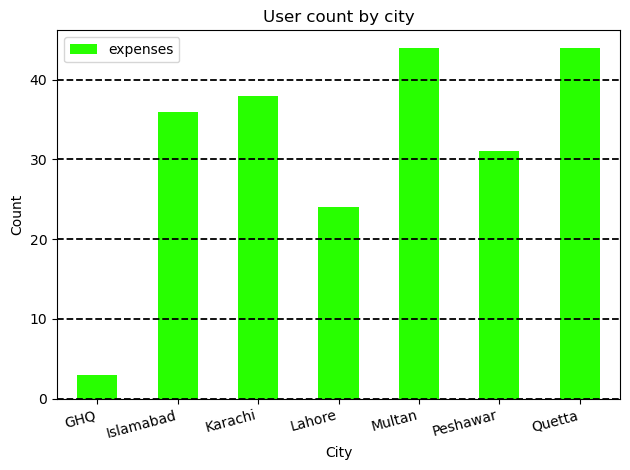

In [34]:
#1

count_by_city.plot(x='City', y='User ID', kind='bar', ls='-',color='#28FF00',label='expenses')

pt.title("User count by city")
pt.xlabel("City")
pt.ylabel("Count")
pt.xticks(rotation=15, ha='right')
pt.grid(axis='y', linestyle='--', alpha=1, lw=1.3,c='#000000')
pt.legend()
pt.tight_layout()
pt.show()

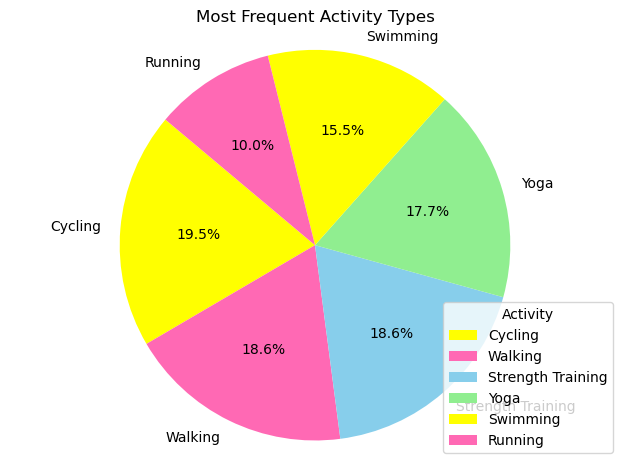

In [35]:
frequent_activity_type.set_index("Activity Type")["count"].plot(kind='pie',autopct='%1.1f%%',startangle=140,colors=['yellow', '#FF69B4', '#87CEEB', '#90EE90'],legend=True)

pt.title("Most Frequent Activity Types")
pt.ylabel("") 
pt.axis('equal')  
pt.legend(title="Activity")
pt.tight_layout()
pt.show()

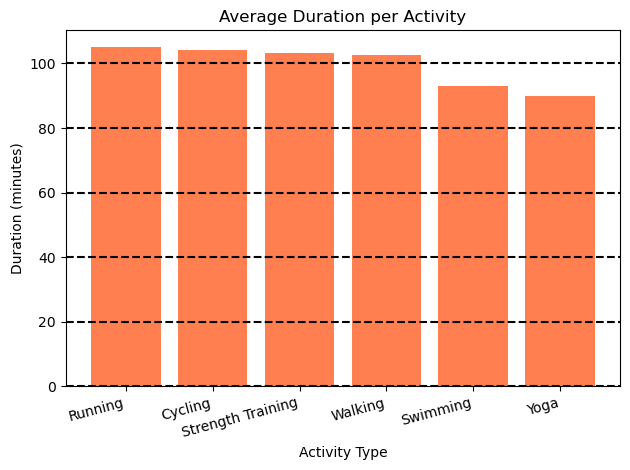

In [36]:
#3
x = duration_per_activity["Activity Type"]
y = duration_per_activity["Duration (min)"]

pt.bar(x, y, color="coral")
pt.title("Average Duration per Activity")
pt.xlabel("Activity Type")
pt.ylabel("Duration (minutes)")
pt.xticks(rotation=15, ha="right")
pt.tight_layout()
pt.grid(axis='y', linestyle='--', alpha=1,lw=1.5,c='#000000')
pt.show()

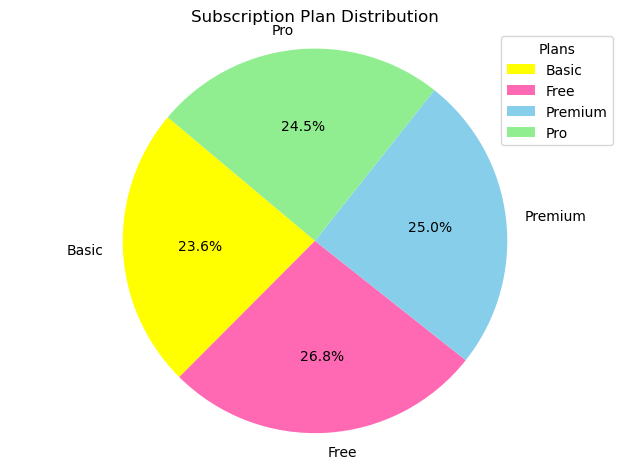

In [37]:
#4

pt.pie(Subs_plan_dist['User ID'], labels=Subs_plan_dist['Subscription Plan'], autopct='%1.1f%%', startangle=140, colors=['yellow', '#FF69B4', '#87CEEB', '#90EE90'] )

pt.title("Subscription Plan Distribution")
pt.axis('equal')  
pt.legend(title="Plans")
pt.tight_layout()
pt.show()

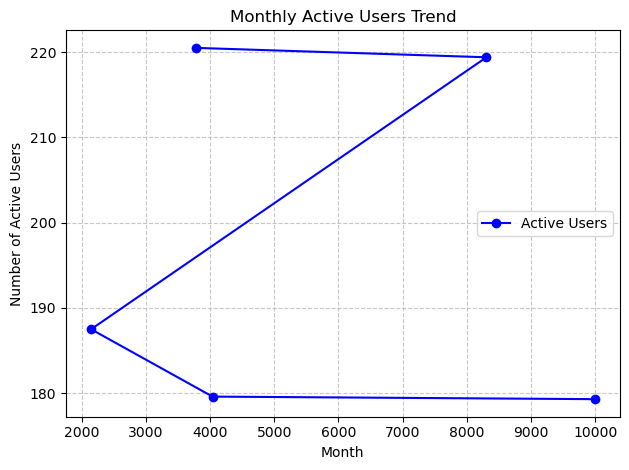

In [38]:
#5
Monthly_active_users.plot(x="User ID", y="Duration (min)", kind="line",ls='-',color='b',marker='o',label='Active Users',ms=6)

pt.title("Monthly Active Users Trend")
pt.xlabel("Month")
pt.ylabel("Number of Active Users")
pt.grid(True, linestyle='--', alpha=0.7)
pt.legend()
pt.tight_layout()
pt.show()

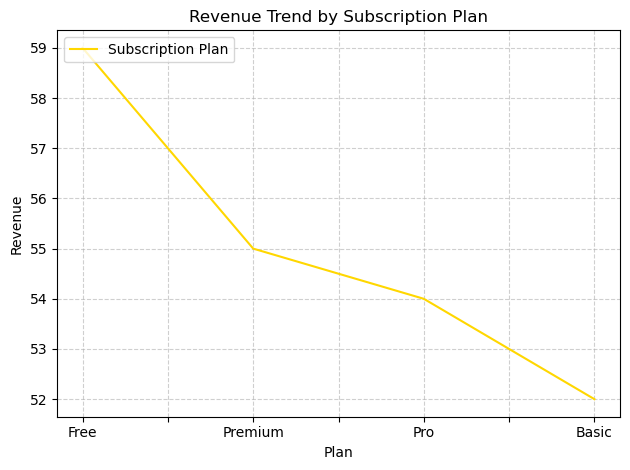

In [39]:
#6
Revenue_trend.plot(x= "Subscription Plan", y= "Monthly Fee",kind='line', color='#FFD700',label = 'Subscription Plan')

pt.title("Revenue Trend by Subscription Plan")
pt.xlabel("Plan")
pt.ylabel("Revenue")
pt.legend(loc="upper left")
pt.grid(True, linestyle='--', alpha=0.6)
pt.tight_layout()
pt.show()

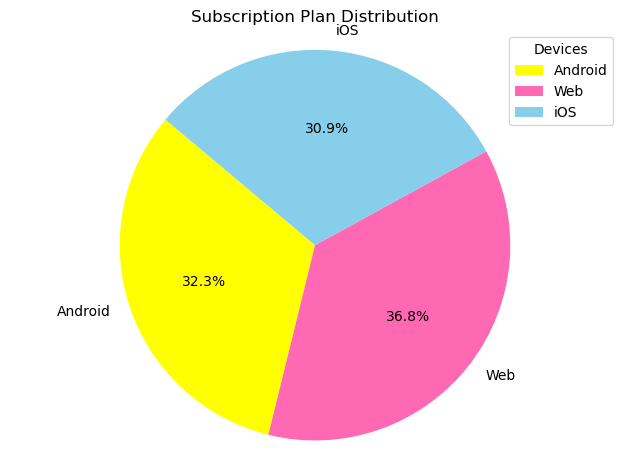

In [40]:
#7
pt.pie(Device_usage['Age'], labels=Device_usage['Device Used'], autopct='%1.1f%%', startangle=140, colors=['yellow', '#FF69B4', '#87CEEB', '#90EE90'] )

pt.title("Subscription Plan Distribution")
pt.axis('equal')  
pt.legend(title="Devices")
pt.tight_layout()
pt.show()

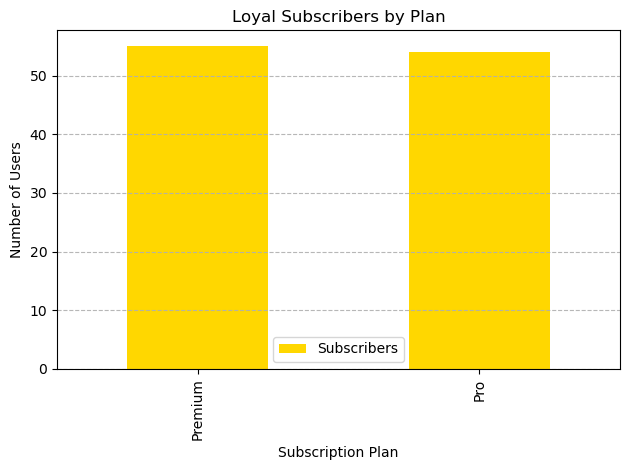

In [41]:
#8
loyal_counts = loyal_subs.groupby("Subscription Plan")["User ID"].nunique()

loyal_counts.plot(kind="bar", color="#FFD700", label="Subscribers")

pt.title("Loyal Subscribers by Plan")
pt.xlabel("Subscription Plan")
pt.ylabel("Number of Users")
pt.legend()
pt.grid(axis="y", linestyle="--", alpha=0.9)
pt.tight_layout()
pt.show()

- Use **groupby** for aggregated views before plotting.

# Extra Challenge

- Compare average calories burned by **device type** and suggest which device users are most active on.

- Detect **seasonal trends** (e.g., which months have highest activity).